https://tutorials.pytorch.kr/beginner/basics/intro.html

# Tensor

In [47]:
import torch
import numpy as np

# From list
data = [[1,2], [3,4]]
x_data = torch.tensor(data)

# From numpy
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# From tensor
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

# With shape
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor} \n")

# Attributes
tensor = torch.rand(3,4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

# Operation
## Move to GPU
if torch.backends.mps.is_available():
    tensor = tensor.to("mps")
    print(f"Device tensor is stored on: {tensor.device}")
    
## indexing and slicing
tensor = torch.ones(4,4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:,0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:, -1] = 0 # Broadcasting
print(tensor)

## Concat - Same as numpy
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)
t2 = torch.stack([tensor, tensor], dim=1)
print(t2)

## Matrix multiplication
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)
assert torch.all(y1 == y2)
assert torch.all(y2 == y3)

## in-place: with _ postfix - Not-recommended
tensor = torch.zeros(2,2)
tensor.add_(5)
print(tensor)

## Bridge to numpy
### In cpu, tensor and ndarray share same memory
t = torch.ones(5)
n = t.numpy()
t.add_(1)
print(f"ndarray: {n}")

np.add(n, 1, out=n)
print(f"tensor: {t}")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9139, 0.7614],
        [0.5512, 0.1805]]) 

Random Tensor: 
 tensor([[0.4641, 0.7464, 0.7554],
        [0.5698, 0.5334, 0.2480]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Device tensor is stored on: mps:0
First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])
tensor([[1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.]])
tensor([[[1., 1., 1., 0.],
         [1., 1., 1., 0.]],

        [[1., 1., 1., 

# Dataset and Dataloader
```
torch.utils.data.DataLoader := Iter(Dataset)
torch.utils.data.Dataset := Save sample & label
```

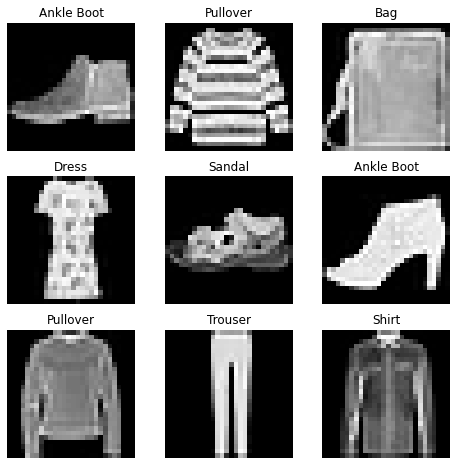

In [58]:
# FastMNIST dataset
## root := train/test dataset path
## train := specify train/test dataset
## download=True := download dataset if data isn't in root
## transform & target_transform := Specify features and label transform

import torch
from torch.utils.data import Dataset
from torchvision import datasets #pre-defined dataset
from torchvision.transforms import ToTensor # transform to tensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train = True,
    download=True,
    transform=ToTensor()
)

# Visualization
labels_map = labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}
fig = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [62]:
# User-defined dataset
## __init__, __len__, __getitem__ are duck-typing(extending Sequence)

import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir # img-stored path
        self.transform = transform
        self.target_transform = target_transform
        
    def __len(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image":image, "label":label}
        return sample

## Dataloader

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


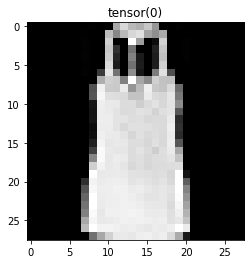

In [74]:
# minibatch & randomly shuffle dataset at every epoch & multiprocessing
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = FashionMNIST(root='data', train=True, transform=ToTensor())
test_data = FashionMNIST(root='data', train=False, transform=ToTensor())

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True) #batch_size = minibatch size
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Iterate
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}") # (batchsize, channel, height, width)
print(f"Labels batch shape: {train_labels.size()}") # (batchsize,)

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.title(label)
plt.show()

# Transform
```torchvision.transforms```
- Dataset MUST have transform and target_transform

In [85]:
# FashionMNIST
## Feature : PIL image
## Label : integer
## To learn them, Normalized feature and one-hat encoded label are needed

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

#ToTensor := Transform PIL Image to Numpy to FloatTensor & [0,1] scaling
#Lambda := Transform data by lambda function

ds = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    #scatter(dim, pos, value)
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.uint8).scatter_(0, torch.tensor(y), value=1))
)

# Construct DNN
```
torch.nn <-- layer/module
Module <- nn.Module's subclass
Network := Module constructing other modules(layers)
```

In [17]:
import os
import torch
from torch.utils.data import DataLoader
from torch import nn
from torchvision import datasets, transforms

device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

# Network Model := Module's subclass
## forward method := implelment all operations about input
class NeuralNetwork(nn.Module):
    def __init__(self): # Initialize all layers
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512, dtype=torch.float32), #in, out
            nn.ReLU(),
            nn.Linear(512, 512, dtype=torch.float32),
            nn.ReLU(),
            nn.Linear(512, 10, dtype=torch.float32),
        )
        
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device) #With mps, torch.float32 is smallest type
print(model)

# Pass data, Don't execute forward directly
X = torch.rand(1, 28, 28, device=device, dtype=torch.float32) # batch-size, height, width
logits = model(X) # Call object

pred_probab = nn.Softmax(dim=1)(logits) # shape = (batch-size, predicts)
y_pred = pred_probab.argmax(1) # argmax(dim)
print(f"Predicted class: {y_pred}")

# Model parameters(W,b)
## parameters() or named_parameters()
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]}\n")

Using mps device
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
  )
)
Predicted class: tensor([6], device='mps:0')
Layer: linear_relu_stack.1.weight | Size: torch.Size([512, 784]) | Values : tensor([[0.0235, 0.0022, 0.0025,  ..., 0.0112, 0.0107, 0.0175],
        [-0.0076, 0.0191, -0.0206,  ..., 0.0215, 0.0345, -0.0283]],
       device='mps:0', grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.1.bias | Size: torch.Size([512]) | Values : tensor([-0.0286, -0.0013], device='mps:0', grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.3.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0275, -0.0243,  0.0384,  ...,  0.0294,  0.0299, -0.0104],
        [ 0.0095, -0.0054, -0.0269,  ..., -0.0063, -0.0365,  0.0398]],
       de

In [8]:
from torch import nn
torch.rand(1, 28, 28, dtype=torch.float32, device="mps")

/Users/teddy/miniforge3/envs/Data/lib/python3.10/site-packages/torch/_tensor_str.py:103: UserWarning: The operator 'aten::bitwise_and.Tensor_out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(tensor_view, torch.isfinite(tensor_view) & tensor_view.ne(0))


tensor([[[0.0480, 0.9727, 0.1179, 0.4476, 0.5194, 0.7816, 0.7983, 0.2220,
          0.4442, 0.8119, 0.3915, 0.5462, 0.9401, 0.9585, 0.0247, 0.2086,
          0.2767, 0.6273, 0.1648, 0.8782, 0.6751, 0.6710, 0.8193, 0.4928,
          0.3491, 0.3783, 0.4277, 0.4517],
         [0.8560, 0.3453, 0.5194, 0.0611, 0.7148, 0.4885, 0.7672, 0.6725,
          0.8610, 0.7294, 0.3079, 0.8449, 0.0338, 0.0065, 0.3019, 0.3122,
          0.5447, 0.0085, 0.5579, 0.8407, 0.0560, 0.1202, 0.8265, 0.0989,
          0.3589, 0.6444, 0.5160, 0.1154],
         [0.4868, 0.0453, 0.4739, 0.1333, 0.2674, 0.0196, 0.0755, 0.7501,
          0.6512, 0.3090, 0.6283, 0.2417, 0.5981, 0.7450, 0.9058, 0.8109,
          0.3889, 0.6039, 0.8796, 0.9479, 0.9702, 0.9804, 0.8737, 0.1561,
          0.6883, 0.6674, 0.6813, 0.7868],
         [0.9287, 0.0413, 0.5819, 0.7073, 0.0497, 0.4346, 0.2813, 0.5731,
          0.7316, 0.5864, 0.9392, 0.1129, 0.9759, 0.6274, 0.0825, 0.8701,
          0.2704, 0.2424, 0.9972, 0.4145, 0.9990, 0.2189,

# Auto derivative
```
Backward-Pass
```

In [37]:
import torch

x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True) # To Calculate gradient
b = torch.randn(3, requires_grad=False)
b.requires_grad_(False)
z = x @ w + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

# Backward-pass's function reference is saved in grad_fn
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

# Gradient
loss.backward()
print(w.grad)
print(b.grad) # If required_grad = False, backward doesn't calcuate gradient

# If learning model is done, torch.no_grad used for stop tracking gradient
z = x @ w + b
print(z.requires_grad)
with torch.no_grad():
    z = x @ w + b
    print(z.requires_grad)

# OR
z_det = z.detach()
print(z_det.requires_grad)

# Why?
## Fixed-parameter - pre-learning model's fitting
## End of learing - Fast operation


## If loss functions are arbitrary tensor-functions, then gradient is Jaccobian
## Pytorch calculate vT @ J
inp = torch.eye(5, requires_grad=True)
out = (inp + 1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True) #backward(x for gradient(x), retain_graph for tracking gradient)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(inp), retain_graph=True)
print(f"\nSecond call\n{inp.grad}") # Gradients are accomulated
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

Gradient function for z = <AddBackward0 object at 0x153631d80>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x162aabfd0>
tensor([[0.2798, 0.2725, 0.0469],
        [0.2798, 0.2725, 0.0469],
        [0.2798, 0.2725, 0.0469],
        [0.2798, 0.2725, 0.0469],
        [0.2798, 0.2725, 0.0469]])
None
True
False
False
First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


# Optimize model parameters
```
with gradient, optimize parameters
```

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    transform=ToTensor(),
#     target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float32).scatter_(0, torch.tensor(y), 1))
)
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    transform=ToTensor(),
#     target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float32).scatter_(0, torch.tensor(y), 1))
)

batch_size = 64
train_dataloader = DataLoader(training_data, batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, shuffle=True)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Flatten(1, -1),
            nn.ReLU(),
            nn.Linear(28*28, 512, dtype=torch.float32),
            nn.ReLU(),
            nn.Linear(512, 10, dtype=torch.float32),
        )
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

device = "mps" if torch.backends.mps.is_available() else "cpu"
model = NeuralNetwork().to(device)

# Hyper-parameters
## The number of epochs
## The size of batch
## The learning late: step of learning

learning_rate = 1e-3
batch_size = 64
epochs = 5

# Single epoch divides into 
## Train loop : Optimize parameters(train dataset)
## Validation/Test loop : validate the performance(test dataset)

# Loss
## nn.MSELoss: Mean Square Error for regression
## nn.NLLLoss : Negative Log Likelihood for classification
## nn.LogSoftmax : for classification
## nn.CrossEntropyLoss : NLL + LogSoftmax for classification

# Optimizer
## torch.optim.some_optimizers
## parameter & learning_rate are passed

# The steps of optimization
## 1. optimizer.zero_grad() to reset gradient
## 2. loss.backwards() to back-propagation
## 3. optimizer.step() to adjust parameters

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X.to(device))
        loss = loss_fn(pred, y.to(device))
        
        #backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.to(device))
            test_loss += loss_fn(pred, y.to(device)).item()
            correct += (pred.argmax(1) == y.to(device)).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")
    
    
# Loss & optimizer
loss_fn = nn.CrossEntropyLoss() # Doesn't need one-hot vector transform
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)




epochs = 1
for t in range(epochs):
    print(f"Epoch {t+1}\n---------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
---------------------------
loss: 2.298495 [    0/60000]
loss: 2.220819 [ 6400/60000]
loss: 2.182690 [12800/60000]
loss: 2.119566 [19200/60000]
loss: 2.069765 [25600/60000]
loss: 1.976187 [32000/60000]
loss: 1.993634 [38400/60000]
loss: 1.950657 [44800/60000]
loss: 1.812464 [51200/60000]
loss: 1.694620 [57600/60000]
Test Error: 
 Accuracy: 62.5%, Avg loss: 1.779701

Done!


# Save & Load

In [5]:
import torch
import torchvision.models as models

# Parameter is stored in state_dict(internal state dictionary)
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

model = models.vgg16()
model.load_state_dict(torch.load('model_weights.pth'))
print(model)

# Save with model structure
torch.save(model, 'model.pth')

model = torch.load('model.pth')



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1